## Observations and Insights 

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np
from scipy import stats
                                                                                                                                                                                                                                                                                                                                                                            
# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
combined_df = pd.merge(mouse_metadata, study_results, how="left", on="Mouse ID")

# Display the data table for preview
combined_df


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [2]:
#Find duplicate mice by using unique in the DataFrame
# duplicate_df = combined_df.groupby(["Mouse ID"])
# duplicate_find_df = duplicate_df[["Mouse ID", "Timepoint"]].unique()
# duplicate_find_df
combined_df["Mouse ID"].nunique()


249

In [3]:
duplicate_mouse = combined_df.loc[combined_df.duplicated(subset=["Mouse ID", "Timepoint"]),"Mouse ID"].unique()
duplicate_mouse

array(['g989'], dtype=object)

In [4]:
duplicate = combined_df.loc[combined_df["Mouse ID"] == "g989" ]
duplicate               

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
908,g989,Propriva,Female,21,26,0,45.000000,0
909,g989,Propriva,Female,21,26,0,45.000000,0
910,g989,Propriva,Female,21,26,5,48.786801,0
911,g989,Propriva,Female,21,26,5,47.570392,0
912,g989,Propriva,Female,21,26,10,51.745156,0
913,g989,Propriva,Female,21,26,10,49.880528,0
914,g989,Propriva,Female,21,26,15,51.325852,1
915,g989,Propriva,Female,21,26,15,53.442020,0
916,g989,Propriva,Female,21,26,20,55.326122,1
917,g989,Propriva,Female,21,26,20,54.657650,1


In [5]:
#Calculated number of mice after removing the duplicate mouse
duplicates_dropped_df = combined_df[combined_df["Mouse ID"].isin(duplicate_mouse)==False]
duplicates_dropped_df["Mouse ID"].nunique()

248

## Summary Statistics

In [6]:
#Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
#Calculate the mean of the tumor volume for each drug regimen
#Make sure you do the calculation per drug
tumor_mean = duplicates_dropped_df.groupby("Drug Regimen")["Tumor Volume (mm3)"].mean()
tumor_mean

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary dataframe.



Drug Regimen
Capomulin    40.675741
Ceftamin     52.591172
Infubinol    52.884795
Ketapril     55.235638
Naftisol     54.331565
Placebo      54.033581
Propriva     52.320930
Ramicane     40.216745
Stelasyn     54.233149
Zoniferol    53.236507
Name: Tumor Volume (mm3), dtype: float64

In [7]:
#Calculate the median of the tumor volume for each drug regimen
tumor_median = duplicates_dropped_df.groupby("Drug Regimen")["Tumor Volume (mm3)"].median()
tumor_median

Drug Regimen
Capomulin    41.557809
Ceftamin     51.776157
Infubinol    51.820584
Ketapril     53.698743
Naftisol     52.509285
Placebo      52.288934
Propriva     50.446266
Ramicane     40.673236
Stelasyn     52.431737
Zoniferol    51.818479
Name: Tumor Volume (mm3), dtype: float64

In [8]:
#Calculate the variance of the tumor volume for each drug regimen
tumor_var = duplicates_dropped_df.groupby("Drug Regimen")["Tumor Volume (mm3)"].var()
tumor_var

Drug Regimen
Capomulin    24.947764
Ceftamin     39.290177
Infubinol    43.128684
Ketapril     68.553577
Naftisol     66.173479
Placebo      61.168083
Propriva     43.852013
Ramicane     23.486704
Stelasyn     59.450562
Zoniferol    48.533355
Name: Tumor Volume (mm3), dtype: float64

In [9]:
#Calculate the std. deviation of the tumor volume for each drug regimen
tumor_std = duplicates_dropped_df.groupby("Drug Regimen")["Tumor Volume (mm3)"].std()
tumor_std  

Drug Regimen
Capomulin    4.994774
Ceftamin     6.268188
Infubinol    6.567243
Ketapril     8.279709
Naftisol     8.134708
Placebo      7.821003
Propriva     6.622085
Ramicane     4.846308
Stelasyn     7.710419
Zoniferol    6.966589
Name: Tumor Volume (mm3), dtype: float64

In [10]:
tumor_sem = duplicates_dropped_df.groupby("Drug Regimen")["Tumor Volume (mm3)"].sem()
tumor_sem  

Drug Regimen
Capomulin    0.329346
Ceftamin     0.469821
Infubinol    0.492236
Ketapril     0.603860
Naftisol     0.596466
Placebo      0.581331
Propriva     0.544332
Ramicane     0.320955
Stelasyn     0.573111
Zoniferol    0.516398
Name: Tumor Volume (mm3), dtype: float64

In [11]:
summary_stats_df = pd.DataFrame({"mean": tumor_mean, "median": tumor_median, "var": tumor_var, "std": tumor_std, "sem": tumor_sem})
summary_stats_df

,mean,median,var,std,sem
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [12]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
# Using the aggregation method, produce the same summary statistics in a single line
tumor_summary_table = duplicates_dropped_df.groupby("Drug Regimen").agg([
                                   "mean",
                                   "median",
                                   "var",
                                   "std",
                                   "sem"])
tumor_stats = tumor_summary_table.loc[:,"Tumor Volume (mm3)"]
tumor_summary_table

Age_months                                       Weight (g)  \
                   mean median        var       std       sem       mean   
Drug Regimen                                                               
Capomulin     13.456522   16.5  59.620372  7.721423  0.509136  19.965217   
Ceftamin      13.247191   12.0  65.147591  8.071406  0.604977  27.398876   
Infubinol     16.230337   20.0  56.404272  7.510278  0.562919  27.196629   
Ketapril      15.659574   18.0  36.236432  6.019670  0.439030  27.861702   
Naftisol      12.000000    9.0  45.102703  6.715855  0.492430  27.166667   
Placebo       10.734807   10.0  40.384837  6.354907  0.472356  27.928177   
Propriva      10.006757    7.5  48.251655  6.946341  0.570986  27.135135   
Ramicane      10.684211    9.0  35.362393  5.946629  0.393825  19.679825   
Stelasyn      12.784530   14.0  63.036648  7.939562  0.590143  27.856354   
Zoniferol     12.598901   12.5  33.479115  5.786114  0.428895  27.692308   

                                                    ... Tumor Volume (mm3)  \
             median        var       std       sem  ...               mean   
Drug Regimen                                        ...                      
Capomulin      20.5   7.466034  2.732404  0.180169  ...          40.675741   
Ceftamin       28.0   2.501016  1.581460  0.118535  ...          52.591172   
Infubinol      27.0   4.769028  2.183810  0.163684  ...          52.884795   
Ketapril       28.0   3.392536  1.841884  0.134333  ...          55.235638   
Naftisol       27.0   2.247748  1.499249  0.109930  ...          54.331565   
Placebo        28.0   3.378146  1.837973  0.136615  ...          54.033581   
Propriva       26.0   2.933995  1.712891  0.140799  ...          52.320930   
Ramicane       19.0  10.465318  3.235014  0.214244  ...          40.216745   
Stelasyn       28.0   2.701473  1.643616  0.122169  ...          54.233149   
Zoniferol      28.0   2.015300  1.419612  0.105229  ...          53.236507   

                                                       Metastatic Sites  \
                 median        var       std       sem             mean   
Drug Regimen                                                              
Capomulin     41.557809  24.947764  4.994774  0.329346         0.713043   
Ceftamin      51.776157  39.290177  6.268188  0.469821         1.179775   
Infubinol     51.820584  43.128684  6.567243  0.492236         0.960674   
Ketapril      53.698743  68.553577  8.279709  0.603860         1.297872   
Naftisol      52.509285  66.173479  8.134708  0.596466         1.182796   
Placebo       52.288934  61.168083  7.821003  0.581331         1.441989   
Propriva      50.446266  43.852013  6.622085  0.544332         1.013514   
Ramicane      40.673236  23.486704  4.846308  0.320955         0.548246   
Stelasyn      52.431737  59.450562  7.710419  0.573111         0.872928   
Zoniferol     51.818479  48.533355  6.966589  0.516398         1.230769   

                                                   
             median       var       std       sem  
Drug Regimen                                       
Capomulin         0  0.720790  0.848993  0.055981  
Ceftamin          1  1.402527  1.184283  0.088766  
Infubinol         1  1.054942  1.027104  0.076985  
Ketapril          1  1.942883  1.393873  0.101659  
Naftisol          1  1.479919  1.216519  0.089200  
Placebo           1  1.792449  1.338824  0.099514  
Propriva          1  1.224306  1.106484  0.090952  
Ramicane          0  0.477838  0.691259  0.045780  
Stelasyn          1  0.944874  0.972046  0.072252  
Zoniferol         1  1.559711  1.248884  0.092573  

[10 rows x 25 columns]

## Bar and Pie Charts

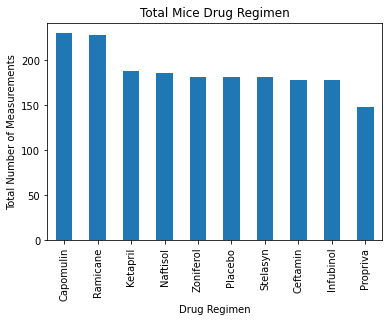

In [13]:
#Generate a bar plot using both Pandas's DataFrame.plot() 
#that shows the number of total mice for each treatment
# regimen throughout the course of the study.
group_df = duplicates_dropped_df["Drug Regimen"].value_counts()
group_df.plot(kind="bar", title="Total Mice Drug Regimen")
plt.xlabel("Drug Regimen")
plt.ylabel("Total Number of Measurements")
plt.xticks(rotation=90)
plt.show()

In [14]:
group_df

Capomulin    230
Ramicane     228
Ketapril     188
Naftisol     186
Zoniferol    182
Placebo      181
Stelasyn     181
Ceftamin     178
Infubinol    178
Propriva     148
Name: Drug Regimen, dtype: int64

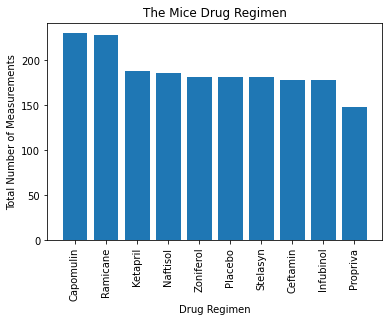

In [15]:
#Generate a bar plot using Matplotlib's pyplot that shows the number
#of total mice for each treatment regimen throughout the course of the study.
#mice_data = combined_df["Mouse ID"].value_counts()
#measurements_data = combined_df["Drug Regimen"].value_counts()
plt.bar(group_df.index.values, group_df.values)
plt.title("The Mice Drug Regimen")
plt.ylabel("Total Number of Measurements")
plt.xlabel("Drug Regimen")
plt.xticks(rotation=90)
plt.show()

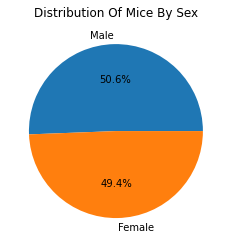

In [16]:
# Generate a pie plot showing the distribution of 
#female versus male mice using pandas
sex_data = combined_df["Sex"].value_counts()
labels = ["Male","Female"]
plt.pie(sex_data, labels=labels, autopct="%.1f%%")
plt.title("Distribution Of Mice By Sex")
plt.show()

Text(0.5, 1.0, 'Distribution Of Mice By Sex')

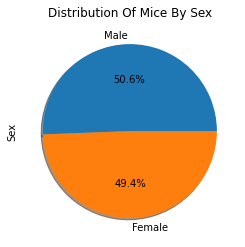

In [17]:
# Generate a pie plot showing the distribution of 
#female versus male mice using pyplot
labels = ["Male", "Female"]
plt.pie(sex_data, labels=labels, autopct="%1.1f%%", shadow=True)
plt.ylabel("Sex")
plt.title("Distribution Of Mice By Sex")

## Quartiles, Outliers and Boxplots

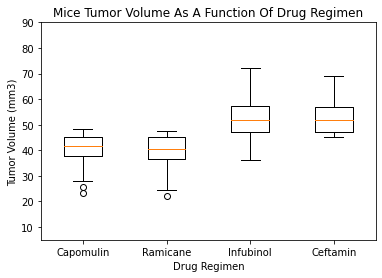

In [38]:
#Calculate the final tumor volume of each mouse across four of the most promising treatment regimens: Capomulin, Ramicane, Infubinol, and Ceftamin. 
#Calculate the quartiles and IQR and quantitatively determine if there 
#are any potential outliers across all four treatment regimens.

#Group data by Drug Regimen and Mouse ID to capture Last Tumor Measurement
best_regimen = duplicates_dropped_df[duplicates_dropped_df["Drug Regimen"].isin(["Ceftamin", "Capomulin", "Infubinol", "Ramicane"])]
best_regimen = best_regimen.sort_values(["Timepoint"], ascending=True)
#best_regimen.head()

#Sort by getting the last (greatest) timepoint for each mouse
best_regimen_max = best_regimen.groupby("Mouse ID")["Timepoint"].max()
best_regimen_max.head()

#Create list of the top 4 regimens
top_4 = ["Capomulin", "Ramicane", "Infubinol","Ceftamin"]

#Generate a four box plots showing the final tumor volume of each mouse as a function of the drug regimen
final_vol_df = best_regimen.reset_index()
tumor_vol = final_vol_df.groupby('Drug Regimen')['Tumor Volume (mm3)'].apply(list)
tumor_vol_df = pd.DataFrame(tumor_lists)
tumor_vol_df = tumor_vol_df.reindex(top_4)
final_tumor_vol = [vol for vol in tumor_vol_df['Tumor Volume (mm3)']]
plt.boxplot(final_tumor_vol, labels=top_4)
plt.title("Mice Tumor Volume As A Function Of Drug Regimen")
plt.ylabel("Tumor Volume (mm3)")
plt.xlabel("Drug Regimen")
plt.ylim(5, 90)
plt.show()

## Line and Scatter Plots

(0.0, 50.0)

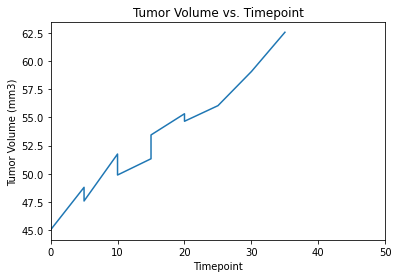

In [51]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin
tumor_vol = combined_df[combined_df["Mouse ID"].isin(["g989"])]
#tumor_vol
timepoint = tumor_vol[["Mouse ID", "Timepoint", "Tumor Volume (mm3)"]]
#timepoint
#Create line plot
plt.plot(tumor_vol["Timepoint"], tumor_vol["Tumor Volume (mm3)"])
plt.title("Tumor Volume vs. Timepoint")
plt.xlabel("Timepoint")
plt.ylabel("Tumor Volume (mm3)")
plt.xlim(0, 50)

Text(0, 0.5, 'Tumor Volume (mm3)')

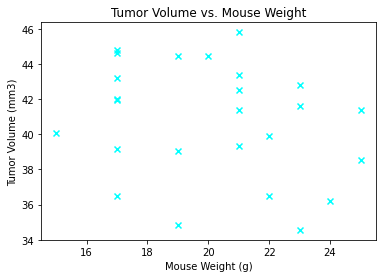

In [59]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen
capomulin_df = duplicates_dropped_df.loc[(duplicates_dropped_df["Drug Regimen"] == "Capomulin"),:]
capomulin_tumor = capomulin_df.groupby("Mouse ID").agg({"Tumor Volume (mm3)": 'mean'})
capomulin_weight = capomulin_df.drop_duplicates(subset="Mouse ID", keep="first")

x_axis = capomulin_weight["Weight (g)"]
y_axis = capomulin_tumor
len(y_axis)
plt.scatter(x_axis, y_axis, marker="x", facecolors="cyan", edgecolors="green")
plt.title("Tumor Volume vs. Mouse Weight")
plt.xlabel("Mouse Weight (g)")
plt.ylabel("Tumor Volume (mm3)")

## Correlation and Regression

In [9]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen


x_axis = capomulin_weight["Weight (g)"]
y_axis = capomulin_tumor
len(y_axis)
plt.scatter(x_axis, y_axis, marker="x", facecolors="cyan", edgecolors="green")
plt.title("Tumor Volume vs. Mouse Weight")
plt.xlabel("Mouse Weight (g)")
plt.ylabel("Tumor Volume (mm3)")
plt.show

NameError: name 'capomulin_weight' is not defined